In [14]:
import pandas as pd;

## Preparando os Datasets



In [15]:
import os
import pandas as pd

def carregar_arquivos_para_dataframe(pasta):
    """
    Lê arquivos .txt de uma pasta, extrai ID, rating e conteúdo, e retorna um DataFrame.

    Args:
        pasta (str): Caminho para a pasta onde estão os arquivos .txt.

    Returns:
        pd.DataFrame: DataFrame contendo as colunas 'id', 'rating' e 'conteudo'.
    """

    arquivos_txt = [f for f in os.listdir(pasta) if f.endswith('.txt')]

  
    dados = []

   
    for arquivo in arquivos_txt:
        caminho_completo = os.path.join(pasta, arquivo)
        with open(caminho_completo, 'r', encoding='utf-8') as f:
            conteudo = f.read()

            
            partes_nome = arquivo.split('_')  
            id_unico = partes_nome[0]  
            rating = partes_nome[1].split('.')[0]  

            
            dados.append({
                'id': int(id_unico),
                'rating': int(rating),
                'conteudo': conteudo
            })

    # Cria e retorna o DataFrame
    return pd.DataFrame(dados)

In [ ]:
#Local onde esta a pasta baixada no site do aclImdb 500mb total
pasta = "/Users/gabriel_goncalves/Downloads/aclImdb/train/pos"
pasta2 = "/Users/gabriel_goncalves/Downloads/aclImdb/train/neg"
pasta3 = "/Users/gabriel_goncalves/Downloads/aclImdb/test/pos"
pasta4 = "/Users/gabriel_goncalves/Downloads/aclImdb/test/neg"
df=carregar_arquivos_para_dataframe(pasta)
df_neg=carregar_arquivos_para_dataframe(pasta2)
teste_pos=carregar_arquivos_para_dataframe(pasta3)
teste_neg=carregar_arquivos_para_dataframe(pasta4)

In [17]:
#analisando dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        12500 non-null  int64 
 1   rating    12500 non-null  int64 
 2   conteudo  12500 non-null  object
dtypes: int64(2), object(1)
memory usage: 293.1+ KB


In [18]:
# organizando id/index
df_ordenado = df.sort_values(by="id", ascending=True)
df_ordenado = df_ordenado.reset_index(drop=True)
df_ordenado.head()


,id,rating,conteudo
0,0,9,Bromwell High is a cartoon comedy. It ran at t...
1,1,7,"If you like adult comedy cartoons, like South ..."
2,2,9,Bromwell High is nothing short of brilliant. E...
3,3,10,"""All the world's a stage and its people actors..."
4,4,8,FUTZ is the only show preserved from the exper...


In [19]:
#definindo bool para os positivos
df_ordenado["is_pos"] = 1
#dropando id que nao sera usado
df_ordenado.drop(axis=1,labels="id",inplace=True)
df_ordenado.head()

,rating,conteudo,is_pos
0,9,Bromwell High is a cartoon comedy. It ran at t...,1
1,7,"If you like adult comedy cartoons, like South ...",1
2,9,Bromwell High is nothing short of brilliant. E...,1
3,10,"""All the world's a stage and its people actors...",1
4,8,FUTZ is the only show preserved from the exper...,1


In [20]:
#mesmo processos de transformacao porem para o dataset de negativos, bool=0
df_ordenado_neg = df_neg.sort_values(by="id", ascending=True)
df_ordenado_neg = df_ordenado_neg.reset_index(drop=True)
df_ordenado_neg["is_pos"] = 0
df_ordenado_neg.drop(axis=1,labels="id",inplace=True)

In [21]:
#juntando os datasets
df_treino = pd.concat([df_ordenado, df_ordenado_neg], axis=0)
df_treino.describe()

,rating,is_pos
count,25000.000000,25000.00000
mean,5.477720,0.50000
std,3.466477,0.50001
min,1.000000,0.00000
25%,2.000000,0.00000
50%,5.500000,0.50000
75%,9.000000,1.00000
max,10.000000,1.00000


In [22]:
#mesmo processos de transformacao porem para o dataset de negativos, bool=0
df_ordenado_neg = df_neg.sort_values(by="id", ascending=True)
df_ordenado_neg = df_ordenado_neg.reset_index(drop=True)
df_ordenado_neg["is_pos"] = 0
df_ordenado_neg.drop(axis=1,labels="id",inplace=True)

In [23]:
#teste_pos
#mesmo processos de transformacao porem para o dataset de testes positivos
teste_pos = teste_pos.sort_values(by="id", ascending=True)
teste_pos = teste_pos.reset_index(drop=True)
teste_pos["is_pos"] = 1
teste_pos.drop(axis=1,labels="id",inplace=True)
teste_pos.head()

,rating,conteudo,is_pos
0,10,I went and saw this movie last night after bei...,1
1,10,My boyfriend and I went to watch The Guardian....,1
2,7,My yardstick for measuring a movie's watch-abi...,1
3,7,How many movies are there that you can think o...,1
4,10,This movie was sadly under-promoted but proved...,1


In [24]:
#teste_pos
#mesmo processos de transformacao porem para o dataset de testes positivos
teste_neg = teste_neg.sort_values(by="id", ascending=True)
teste_neg = teste_neg.reset_index(drop=True)
teste_neg["is_pos"] = 1
teste_neg.drop(axis=1,labels="id",inplace=True)
teste_neg.head()

,rating,conteudo,is_pos
0,2,Once again Mr. Costner has dragged out a movie...,1
1,3,This is a pale imitation of 'Officer and a Gen...,1
2,3,"It seems ever since 1982, about every two or t...",1
3,4,"Wow, another Kevin Costner hero movie. Postman...",1
4,4,"Alas, another Costner movie that was an hour t...",1


In [25]:
#cria o dataset de teste
df_teste = pd.concat([df_ordenado, df_ordenado_neg], axis=0)
df_teste.describe()

,rating,is_pos
count,25000.000000,25000.00000
mean,5.477720,0.50000
std,3.466477,0.50001
min,1.000000,0.00000
25%,2.000000,0.00000
50%,5.500000,0.50000
75%,9.000000,1.00000
max,10.000000,1.00000


In [26]:
#algumas importacoes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
#import SentenceTransformer

## Pré Processamento

In [27]:
# removendo pontuacoes e stop-worlds
import re
from nltk.corpus import stopwords
import nltk

# baixa stopwords do NLTK 
nltk.download('stopwords')

# Carregar a lista de stopwords ingles
stop_words = set(stopwords.words('english'))


def clean_text(text):
    #caracteres especiais
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    #letras minúsculas
    text = text.lower().strip()
    # Remove stopwords
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text


df_treino["conteudo"] = df_treino["conteudo"].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabriel_goncalves/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
df_treino["conteudo"]

0        bromwell high cartoon comedy ran time programs...
1        like adult comedy cartoons like south park nea...
2        bromwell high nothing short brilliant expertly...
3        worlds stage people actors itor something like...
4        futz show preserved experimental theatre movem...
                               ...                        
12495    ok love bad horror especially love horror bad ...
12496    brutally honest loved watching severed thats i...
12497    im sure folks texaslouisiana border must good ...
12498    film kernel really good story work men women c...
12499    went movie sneak preview austria didnt idea go...
Name: conteudo, Length: 25000, dtype: object

In [29]:
import numpy as np

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
# Carregar o modelo Sentence Transformer
model = SentenceTransformer('all-mpnet-base-v2')


# Gerar embeddings para o conjunto de treino e teste
train_embeddings = model.encode(df_treino["conteudo"].tolist(), show_progress_bar=True)
test_embeddings = model.encode(df_teste["conteudo"].tolist(), show_progress_bar=True)

Batches: 100%|██████████| 782/782 [1:02:52<00:00,  4.82s/it]


In [31]:
print(train_embeddings.shape)  # Deve ser (n_amostras, n_características)
print(test_embeddings.shape)   # Deve ser (n_amostras, n_características)

(25000, 768)
(25000, 768)


## Modelo

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Treinar classificador ---- Testar depois------
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_embeddings, df_treino["is_pos"])

RandomForestClassifier(random_state=42)

In [ ]:
#TESTANDO metricas com limiar de decisao
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


probabilidades = classifier.predict_proba(test_embeddings)

# Definir o limiar de decisão
limiar = 0.54 

# Ajustar as predições com base no limiar
predicoes = (probabilidades[:, 1] >= limiar).astype(int)


acuracia = accuracy_score(df_teste["is_pos"], predicoes)
precisao = precision_score(df_teste["is_pos"], predicoes)
recall = recall_score(df_teste["is_pos"], predicoes)
f1 = f1_score(df_teste["is_pos"], predicoes)


print(f"Resultados com limiar de {limiar}:")
print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Resultados com limiar de 0.54:
Acurácia: 0.8450
Precisão: 0.8480
Recall: 0.8406
F1-Score: 0.8443


In [33]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier.predict(test_embeddings)

# Avaliar desempenho
print("Accuracy:", accuracy_score(df_teste["is_pos"], y_pred))
print("Classification Report:\n", classification_report(df_teste["is_pos"], y_pred))


Accuracy: 0.83708
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83     12500
           1       0.80      0.89      0.85     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



## Visualização

In [34]:
def clean_text(text):
    #caracteres especiais
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    #letras minúsculas
    text = text.lower().strip()
    # Remove stopwords
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

In [ ]:
#testando
new_reviews = "i loved the movie!!"
new_reviews= clean_text(new_reviews)
new_embeddings = model.encode(new_reviews)
new_embeddings = new_embeddings.reshape(1, -1)
predictions = classifier.predict(new_embeddings)
prediction_proba = classifier.predict_proba(new_embeddings)
print(f"{predictions} com probabilidade de {np.max(prediction_proba)*100}%")  

[1] com probabilidade de 78.0%


In [36]:
new_embeddings.shape

(1, 768)

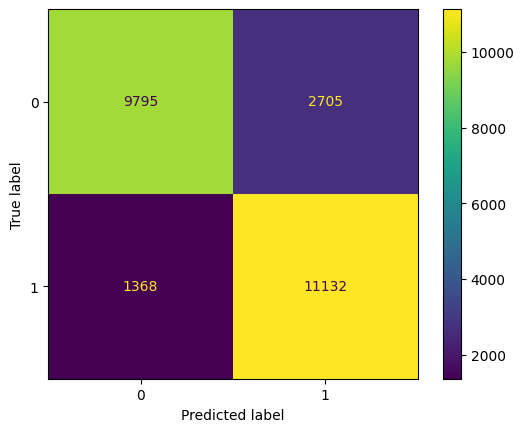

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de confusão
ConfusionMatrixDisplay.from_predictions(df_teste["is_pos"], y_pred)
plt.show()

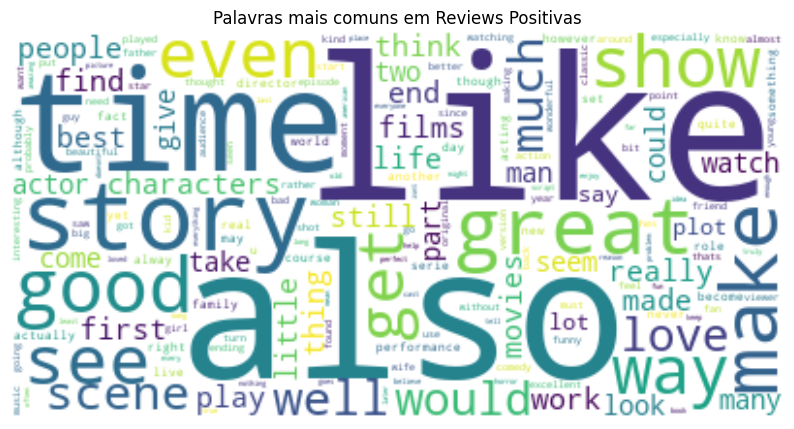

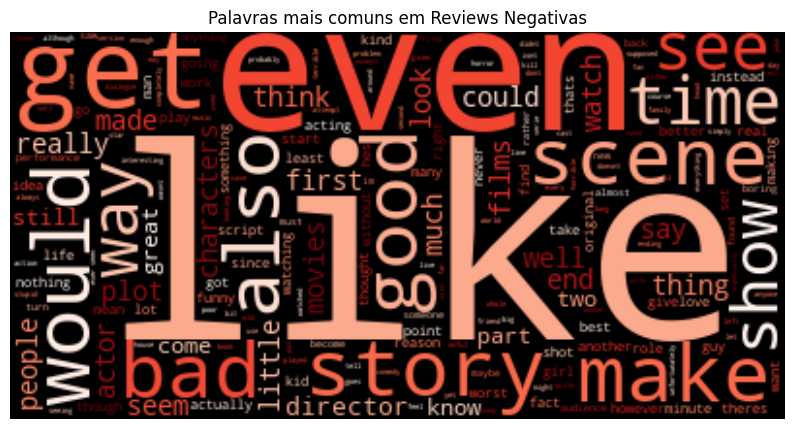

In [38]:
from wordcloud import WordCloud

custom_stopwords=(["Movie","film","one","character","br"])
# WordCloud para reviews positivas
positive_text = " ".join(df_treino[df_treino["is_pos"] == 1]["conteudo"])
wordcloud_pos = WordCloud(stopwords=custom_stopwords, background_color="white").generate(positive_text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Palavras mais comuns em Reviews Positivas")
plt.show()

# WordCloud para reviews negativas
negative_text = " ".join(df_treino[df_treino["is_pos"] == 0]["conteudo"])
wordcloud_neg = WordCloud(stopwords=custom_stopwords,background_color="black", colormap="Reds").generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Palavras mais comuns em Reviews Negativas")
plt.show()

In [ ]:
import joblib

nome_arquivo = "modelo_treinado.joblib"
joblib.dump(classifier, nome_arquivo)

print(f"Modelo salvo com sucesso em '{nome_arquivo}'")

Modelo salvo com sucesso em 'modelo_treinado.joblib'
